In [1]:
import torch
!rm -rf AI-Sports-Analytics-System-2

In [2]:
!rm -rf runs
!rm output.mp4

rm: output.mp4: No such file or directory


In [6]:
!pip install roboflow
!pip install ultralytics==8.0.196

In [2]:
from roboflow import Roboflow
rf = Roboflow(api_key="7tFbyACJmng6tEw4jVju")
project = rf.workspace("asas-annotations").project("ai-sports-analytics-system")
version = project.version(2)
dataset = version.download("yolov8")

loading Roboflow workspace...
loading Roboflow project...


**ASAS object detection training**

In [11]:
from ultralytics import YOLO

# Create ASAS model by loading yolov8n pretrained model
asas_object_detection_model = YOLO('yolox-10-games.pt')

# Train the ASAS model on the NBA dataset
results = asas_object_detection_model.train(data='./datasets/AI-Sports-Analytics-System-2/data.yaml', epochs=30, imgsz=640, device='mps')

New https://pypi.org/project/ultralytics/8.2.2 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.196 🚀 Python-3.12.2 torch-2.2.2 MPS (Apple M3 Max)
engine/trainer: task=detect, mode=train, model=yolox-10-games.pt, data=./datasets/AI-Sports-Analytics-System-2/data.yaml, epochs=30, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=mps, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=False, line_width=None, visualize=False, augmen

KeyboardInterrupt: 

**ASAS Segmentation training**

In [200]:
from ultralytics import YOLO

# Load a model
asas_segmentation_model = YOLO('yolov8n-seg.pt')

# Train the model
results = asas_segmentation_model.train(data='datasets/court_segmentation/data.yaml', epochs=30, imgsz=640, device='mps')

New https://pypi.org/project/ultralytics/8.2.4 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.196 🚀 Python-3.12.2 torch-2.2.2 MPS (Apple M3 Max)
engine/trainer: task=segment, mode=train, model=yolov8n-seg.pt, data=datasets/court_segmentation/data.yaml, epochs=30, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=mps, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=False, line_width=None, visualize=False, augment=False, agnos

KeyboardInterrupt: 

**ASAS Inference**

In [185]:
# Read and save the video files or live feeds
# video_url = 'https://videos.nba.com/nba/pbp/media/2023/12/16/0022300339/12/fe273b80-d8a1-3aa1-6c10-37f7731c0569_1280x720.mp4'
# video_url = 'https://videos.nba.com/nba/pbp/media/2024/03/14/0022300956/7/70c65d7e-6c66-6148-3f35-fca60633455b_1280x720.mp4'
# video_url = 'https://videos.nba.com/nba/pbp/media/2024/03/14/0022300956/10/572cfc3e-3e47-8cca-65d0-ec79c62c15f5_1280x720.mp4'
video_url = 'https://videos.nba.com/nba/pbp/media/2024/04/04/0022301124/16/56783a77-7351-383d-0f4d-d19cf1cfc68b_1280x720.mp4'
save_path = 'test.mp4'
response = requests.get(video_url)
with open(save_path, 'wb') as file:
    file.write(response.content)

**ASAS Object Detection**

In [1]:
import torch
from ultralytics import YOLO
asas_detection_model = YOLO('./weights/yolox-10-games.pt')

asas_detection_model.to(torch.device('mps'))
asas_detection_results = asas_detection_model.track('test.mp4', save=True, conf=0.1)



WARNING ⚠️ inference results will accumulate in RAM unless `stream=True` is passed, causing potential out-of-memory
errors for large sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs

video 1/1 (1/523) /Users/myplayground/PycharmProjects/ASAS/test.mp4: 384x640 1 basketball, 1 net, 10 players, 3 referees, 212.4ms
video 1/1 (2/523) /Users/myplayground/PycharmProjects/ASAS/test.mp4: 384x640 1 basketball, 1 net, 10 players, 3 referees, 31.4ms
video 1/1 (3/523) /Users/myplayground/PycharmProjects/ASAS/test.mp4: 384x640 1 net, 9 players, 3 referees, 19.0ms
video 1/1 (4/523) /Users/myplayground/PycharmProjects/ASAS/test.mp4: 384x640 1 bask

In [3]:
asas_detection_results[0].summary()

AttributeError: 'Results' object has no attribute 'summary'. See valid attributes below.

    A class for storing and manipulating inference results.

    Args:
        orig_img (numpy.ndarray): The original image as a numpy array.
        path (str): The path to the image file.
        names (dict): A dictionary of class names.
        boxes (torch.tensor, optional): A 2D tensor of bounding box coordinates for each detection.
        masks (torch.tensor, optional): A 3D tensor of detection masks, where each mask is a binary image.
        probs (torch.tensor, optional): A 1D tensor of probabilities of each class for classification task.
        keypoints (List[List[float]], optional): A list of detected keypoints for each object.

    Attributes:
        orig_img (numpy.ndarray): The original image as a numpy array.
        orig_shape (tuple): The original image shape in (height, width) format.
        boxes (Boxes, optional): A Boxes object containing the detection bounding boxes.
        masks (Masks, optional): A Masks object containing the detection masks.
        probs (Probs, optional): A Probs object containing probabilities of each class for classification task.
        keypoints (Keypoints, optional): A Keypoints object containing detected keypoints for each object.
        speed (dict): A dictionary of preprocess, inference, and postprocess speeds in milliseconds per image.
        names (dict): A dictionary of class names.
        path (str): The path to the image file.
        _keys (tuple): A tuple of attribute names for non-empty attributes.
    

**ASAS Segmentation**

In [223]:
import torch
from ultralytics import YOLO

asas_segmentation_model = YOLO('runs/segment/yolov8n-seg_training/weights/best.pt')
asas_segmentation_model.to(torch.device('mps'))
segmentation_results = asas_segmentation_model.track('test.mp4', save=True, conf=0.1)



WARNING ⚠️ inference results will accumulate in RAM unless `stream=True` is passed, causing potential out-of-memory
errors for large sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs

video 1/1 (1/523) /Users/myplayground/PycharmProjects/ASAS/test.mp4: 384x640 1 basketball-court, 1 paint, 1 three-point-line, 42.1ms
video 1/1 (2/523) /Users/myplayground/PycharmProjects/ASAS/test.mp4: 384x640 1 basketball-court, 1 paint, 1 three-point-line, 22.3ms
video 1/1 (3/523) /Users/myplayground/PycharmProjects/ASAS/test.mp4: 384x640 1 basketball-court, 1 paint, 1 three-point-line, 23.5ms
video 1/1 (4/523) /Users/myplayground/PycharmProjects/ASA

In [239]:
arr = segmentation_results[313].masks.xy
arr[0]

array([[        618,         328],
       [        616,         330],
       [        572,         330],
       ...,
       [        762,         330],
       [        756,         330],
       [        754,         328]], dtype=float32)

In [244]:
print(arr[0][0][0])

618.0


In [ ]:
import matplotlib.pyplot as plt
import cv2

# segmentation_results    

plt.figure(figsize=(30, 12))
    
fgm_result = asas_detection_results[313]
image_rgb = cv2.cvtColor(fgm_result.orig_img, cv2.COLOR_BGR2RGB)
# image_rgb = np.resize(image_rgb, (int(width), int(height), image_rgb.shape[2]))
# print('extent -> ',extent)
print('image_rgb.shape', image_rgb.shape)
plt.imshow(image_rgb, alpha=0.35)



# Plot the bounding box of first net
plt.plot(first_net_corners_x, first_net_corners_y, color='red', linewidth=2)
# Plot the position of ball on the field
x_ball = [centroid[0] for centroid in offsetted_ball_centroid_tracker]
y_ball = [centroid[1] for centroid in offsetted_ball_centroid_tracker]
plt.scatter(x_ball, y_ball, marker='o', color=team_possession)
# Plot the position of net on the field
x_net = [centroid[0] for centroid in offsetted_net_centroid_tracker]
y_net = [centroid[1] for centroid in offsetted_net_centroid_tracker]
plt.plot(x_net, y_net, marker='v', color="red")

# extent = [plt.xlim()[0], plt.xlim()[1], plt.ylim()[0], plt.ylim()[1]]

last_x_net = x_net[-1]
last_y_net = y_net[-1]
# for (x, y) in zip(x_net, y_net):
#     plt.annotate(f'({x}, {y})', (x, y), textcoords="offset points", xytext=(0,10), ha='center')
# Plotting arrows between points
for i in range(len(x_ball) - 1):
    plt.arrow(x_ball[i], y_ball[i], x_ball[i + 1] - x_ball[i], y_ball[i + 1] - y_ball[i],
                  shape='full', lw=0.5, length_includes_head=True, head_width=7.5, color=team_possession[i])
plt.xlabel('x')
plt.ylabel('y')
plt.title('Ball movement during play')

orig_h_w_of_image ->  (720, 1280)
len of ball centroids ->  523
len of net centroids ->  523
image_rgb.shape (720, 1280, 3)


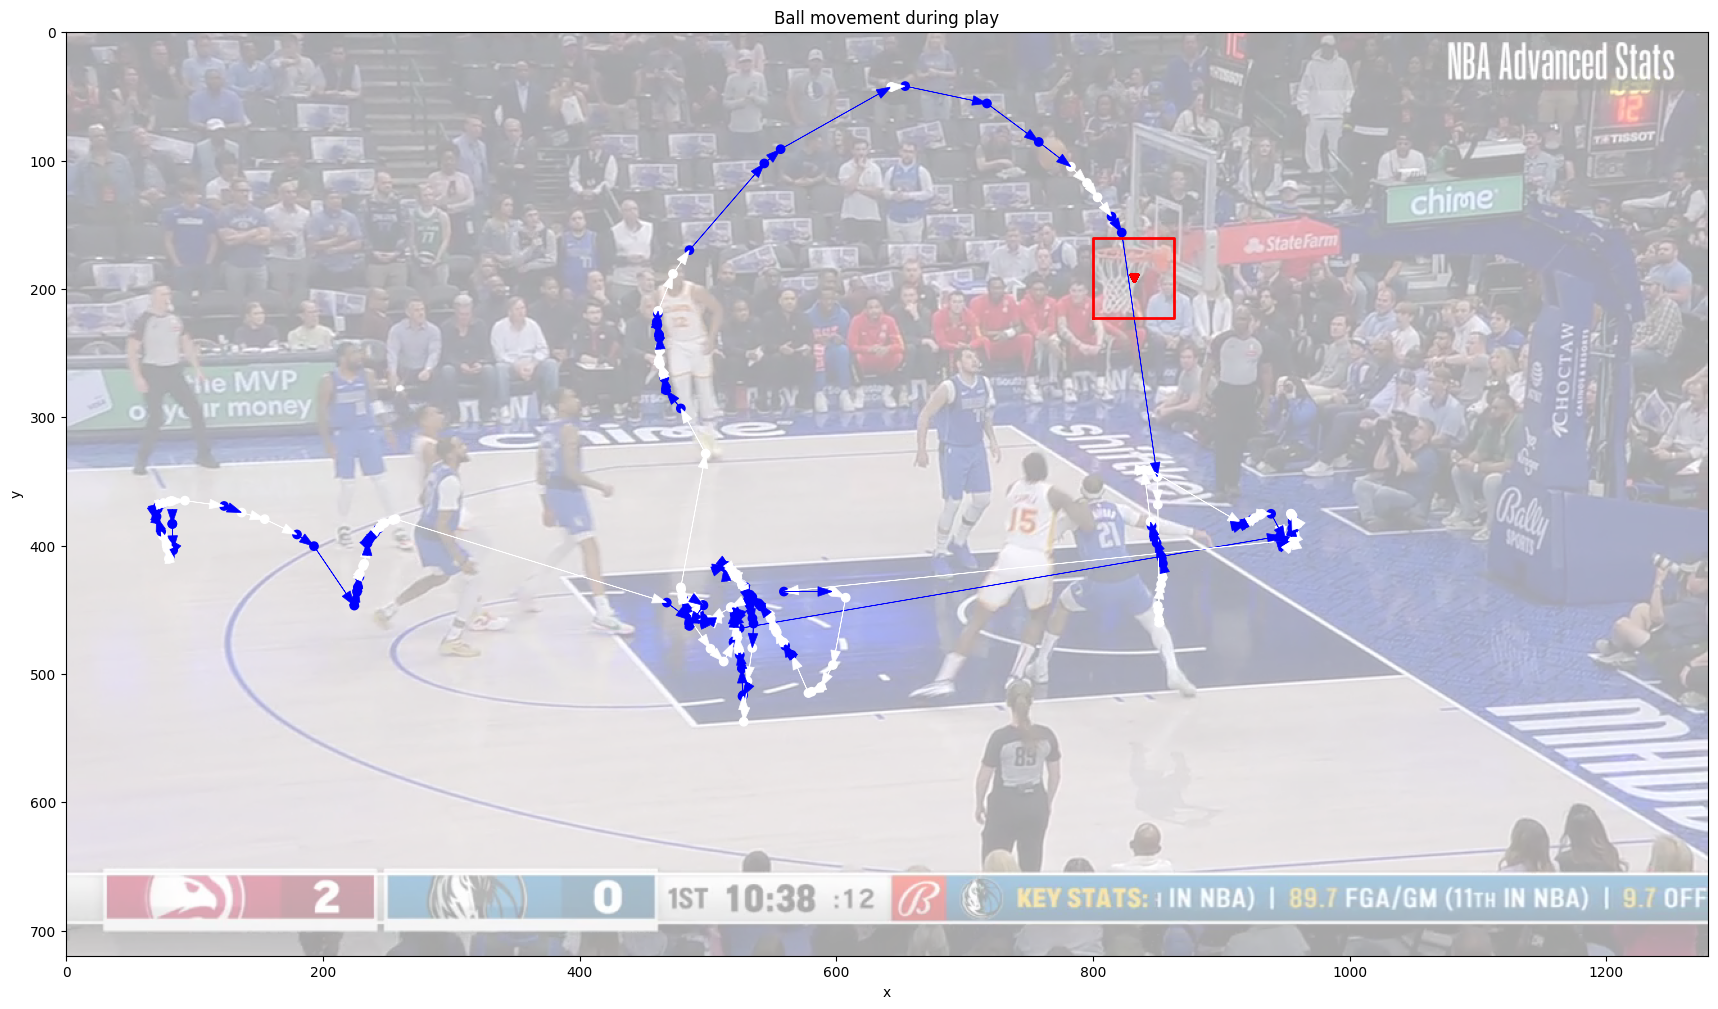

In [197]:
import json
import math
import numpy as np
import matplotlib.pyplot as plt

def get_team_possession_info():
    team_possession_by_frame = {}
    flip = False
    for frame_idx, result in enumerate(asas_detection_results):
        flip = not flip if frame_idx % 5 == 0 else flip
        team_possession_by_frame[frame_idx] = 'blue' if flip else 'white'
    
    return team_possession_by_frame

def get_centroid_from_xyxy(bb_object):
    x_center_object = (bb_object["box"]["x1"] + bb_object["box"]["x2"]) / 2
    y_center_object = (bb_object["box"]["y1"] + bb_object["box"]["y2"]) / 2
    return (x_center_object, y_center_object)

def distance_between_center_of_2_objects(bb_object1, bb_object2):
  if bb_object1 is None or bb_object2 is None:
    return math.inf

  x_center_object1, y_center_object1 = get_centroid_from_xyxy(bb_object1)
  x_center_object2, y_center_object2 = get_centroid_from_xyxy(bb_object2)
   
  return ((x_center_object2-x_center_object1)**2 + (y_center_object2-y_center_object1)**2) ** 0.5

no = 0
distance_tracker = []
ball_centroid_tracker = []
net_centroid_tracker = []
offsetted_ball_centroid_tracker = []
offsetted_net_centroid_tracker = []

# def get_centroid_from_xywhn(bb_object):
#     return (bb_object[0], bb_object[1])

# def plot_as_is(mat_plt):
#     global x_ball, y_ball, x_net, y_net, last_x_net, last_y_net, i
#     
#     mat_plt.figure(figsize=(12, 30))
#     # Plot the bounding box of first net
#     mat_plt.plot(first_net_corners_x, first_net_corners_y, color='red', linewidth=2)
#     # Plot the position of ball on the field
#     x_ball = [centroid[0] for centroid in ball_centroid_tracker if len(centroid) == 4]
#     y_ball = [centroid[1] for centroid in ball_centroid_tracker if len(centroid) == 4]
#     mat_plt.scatter(x_ball, y_ball, marker='o', color="orange")
#     # Plot the position of net on the field
#     x_net = [centroid[0] for centroid in net_centroid_tracker if len(centroid) == 4]
#     y_net = [centroid[1] for centroid in net_centroid_tracker if len(centroid) == 4]
#     mat_plt.plot(x_net, y_net, marker='v', color="red")
#     last_x_net = x_net[-1]
#     last_y_net = y_net[-1]
#     mat_plt.annotate(f'({first_x_center_net}, {first_y_center_net})', (first_x_center_net, first_y_center_net),
#                      textcoords="offset points", xytext=(0, 10), ha='center')
#     mat_plt.annotate(f'({last_x_net}, {last_y_net})', (last_x_net, last_y_net), textcoords="offset points", xytext=(0, 10),
#                      ha='center')
#     # for (x, y) in zip(x_net, y_net):
#     #     plt.annotate(f'({x}, {y})', (x, y), textcoords="offset points", xytext=(0,10), ha='center')
#     # Plotting arrows between points
#     for i in range(len(x_ball) - 1):
#         mat_plt.arrow(x_ball[i], y_ball[i], x_ball[i + 1] - x_ball[i], y_ball[i + 1] - y_ball[i],
#                       shape='full', lw=0.1, length_includes_head=True, head_width=0.0075, color='green')
#     mat_plt.xlabel('x')
#     mat_plt.ylabel('y')
#     mat_plt.title('Ball & Net position')

def plot_ball_net_wrto_initial_net_position(mat_plt, team_possession):
    global x_ball, y_ball, x_net, y_net, last_x_net, last_y_net, i
    
    # width = extent[1] - extent[0]
    # height = extent[3] - extent[2]
    
    # fgm_result = test_results[0]
    # image_rgb = cv2.cvtColor(fgm_result.orig_img, cv2.COLOR_BGR2RGB)
    # # image_rgb = np.resize(image_rgb, (int(width), int(height), image_rgb.shape[2]))
    # print('extent -> ',extent)
    # print('image_rgb.shape', image_rgb.shape)
    # mat_plt.imshow(image_rgb, alpha=0.5, extent=extent)
    # 
    
    # px = 1/plt.rcParams['figure.dpi']  # pixel in inches
    # mat_plt.figure(figsize=(orig_h_w_of_image[1]*px, orig_h_w_of_image[0]*px))
    mat_plt.figure(figsize=(30, 12))
    
    fgm_result = asas_detection_results[313]
    image_rgb = cv2.cvtColor(fgm_result.orig_img, cv2.COLOR_BGR2RGB)
    # image_rgb = np.resize(image_rgb, (int(width), int(height), image_rgb.shape[2]))
    # print('extent -> ',extent)
    print('image_rgb.shape', image_rgb.shape)
    mat_plt.imshow(image_rgb, alpha=0.35)
    
    
    
    # Plot the bounding box of first net
    mat_plt.plot(first_net_corners_x, first_net_corners_y, color='red', linewidth=2)
    # Plot the position of ball on the field
    x_ball = [centroid[0] for centroid in offsetted_ball_centroid_tracker]
    y_ball = [centroid[1] for centroid in offsetted_ball_centroid_tracker]
    mat_plt.scatter(x_ball, y_ball, marker='o', color=team_possession)
    # Plot the position of net on the field
    x_net = [centroid[0] for centroid in offsetted_net_centroid_tracker]
    y_net = [centroid[1] for centroid in offsetted_net_centroid_tracker]
    mat_plt.plot(x_net, y_net, marker='v', color="red")
    
    # extent = [mat_plt.xlim()[0], mat_plt.xlim()[1], mat_plt.ylim()[0], mat_plt.ylim()[1]]
    
    last_x_net = x_net[-1]
    last_y_net = y_net[-1]
    # for (x, y) in zip(x_net, y_net):
    #     plt.annotate(f'({x}, {y})', (x, y), textcoords="offset points", xytext=(0,10), ha='center')
    # Plotting arrows between points
    for i in range(len(x_ball) - 1):
        mat_plt.arrow(x_ball[i], y_ball[i], x_ball[i + 1] - x_ball[i], y_ball[i + 1] - y_ball[i],
                      shape='full', lw=0.5, length_includes_head=True, head_width=7.5, color=team_possession[i])
    mat_plt.xlabel('x')
    mat_plt.ylabel('y')
    mat_plt.title('Ball movement during play')
    
    return extent

    
def overlay_frame(mat_plt, frame_no, alpha=0.5):
    # Overlay frame on the plot
    fgm_result = asas_detection_results[frame_no]
    image_rgb = cv2.cvtColor(fgm_result.orig_img, cv2.COLOR_BGR2RGB)
    mat_plt.imshow(image_rgb, alpha=alpha)

orig_h_w_of_image = asas_detection_results[0].orig_shape
print('orig_h_w_of_image -> ', orig_h_w_of_image)
for test_result in asas_detection_results:
  classes_tensor = test_result.boxes.cls
  ball_index = ball_index.item() if (ball_index:=torch.where(classes_tensor == 0)[0]).numel() == 1 else None
  net_index = net_index.item() if (net_index:=torch.where(classes_tensor == 1)[0]).numel() == 1 else None
  
  ball_xywh = test_result.boxes.xywh[ball_index].numpy() if ball_index else np.empty((0,))
  net_xywh = test_result.boxes.xywh[net_index].numpy() if net_index else np.empty((0,))
      
  # Offsetting Y axis to get 1st quadrant as the YOLOv8 detection is in 4th Quadrant by default.
  # Done by Y coordinate if the point by the height of the image.
  # if ball_xywh.size > 0:
  #     ball_xywh[1] = orig_h_w_of_image[0] - ball_xywh[1]
  #     # ball_xywh[1] = - ball_xywh[1]
  # if net_xywh.size > 0:
  #     net_xywh[1] = orig_h_w_of_image[0] - net_xywh[1]
  #     # net_xywh[1] = - net_xywh[1]
  
  ball_centroid_tracker.append(ball_xywh)
  net_centroid_tracker.append(net_xywh)
  no+=1
  
# distance_tracker = list(filter(lambda distance: (not math.isinf(distance)), distance_tracker))
# fgm_frame_index = distance_tracker.index(min(distance_tracker))
print("len of ball centroids -> ", len(ball_centroid_tracker))
print("len of net centroids -> ", len(net_centroid_tracker))

# print("Tracked Distances -> ", distance_tracker)
# print("Min Distance -> ", min(distance_tracker))
# print("Min Distance index -> ", fgm_frame_index)
# print("Max Distance -> ", max(distance_tracker))
# print("len -> ", len(distance_tracker))

# # Plot the distance b/w net & ball
# plt.figure(figsize=(10,4))
# plt.plot(distance_tracker)
# plt.xlabel('Frame')
# plt.ylabel('Distance')
# plt.title('Distance between ball & net')
# plt.show()
# plt.close()

# plt.figure(figsize=(20,8))

# # Transform to 4th quadrant to match YOLOv8 format
# ball_centroid_tracker = [(centroid[0], 1-centroid[1]) if centroid else None for centroid in ball_centroid_tracker]
# net_centroid_tracker = [(centroid[0], 1-centroid[1]) if centroid else None for centroid in net_centroid_tracker]

first_x_center_net = net_centroid_tracker[313][0]
first_y_center_net = net_centroid_tracker[313][1]
first_width_net = net_centroid_tracker[313][2]
first_height_net = net_centroid_tracker[313][3]

first_net_corners_x = [(first_x_center_net-(first_width_net/2)), (first_x_center_net+(first_width_net/2)), (first_x_center_net+(first_width_net/2)), (first_x_center_net-(first_width_net/2)), (first_x_center_net-(first_width_net/2))]
first_net_corners_y = [(first_y_center_net+(first_height_net/2)), (first_y_center_net+(first_height_net/2)), (first_y_center_net-(first_height_net/2)), (first_y_center_net-(first_height_net/2)), (first_y_center_net+(first_height_net/2))]


team_possession_by_frame = get_team_possession_info()
index = 0
team_possession = []
for net_centroid in net_centroid_tracker:
    if len(net_centroid) == 4:
        net_offset_x = net_centroid[0] - first_x_center_net
        net_offset_y = net_centroid[1] - first_y_center_net
        offsetted_net_centroid_tracker.append(((net_centroid[0] - net_offset_x), (net_centroid[1] - net_offset_y)))
        if len((ball_centroid:=ball_centroid_tracker[index])) == 4:
            offsetted_ball_centroid_tracker.append(((ball_centroid[0] - net_offset_x), (ball_centroid[1] - net_offset_y)))
            team_possession.append(team_possession_by_frame[index])
    index += 1

# # Plot ball & net position per individual frame
# plot_as_is()
# plt.show()
# plt.close()

# # Plot ball & net position with reference to initial net position
# overlay_frame(plt, 327, alpha=0.1)
# Overlay frame on the plot
# fgm_result = test_results[327]
# image_rgb = cv2.cvtColor(fgm_result.orig_img, cv2.COLOR_BGR2RGB)
extent = plot_ball_net_wrto_initial_net_position(plt, orig_h_w_of_image, team_possession)
# plt.imshow(image_rgb, alpha=0.5, extent=extent)
plt.show()
plt.close()




In [6]:
import cv2

# Read the input video
input_video = "./runs/detect/predict34/test.mp4"
cap = cv2.VideoCapture(input_video)

# Get the total number of frames
total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))

# # Specify the index of the frame to be removed
frame_to_remove = 461  # Example index
frame_to_capture = fgm_frame_index  # Example index

# Initialize variables for output video
output_video = "test_cropped.mp4"
fps = cap.get(cv2.CAP_PROP_FPS)
frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
out = cv2.VideoWriter(output_video, fourcc, fps, (frame_width, frame_height))

# Iterate through each frame
for frame_index in range(total_frames):
    ret, frame = cap.read()
    if not ret:
        break

    # Check if the current frame index is the one to be removed
    if frame_index != frame_to_remove:
        # Write the frame to the output video
        # out.write(frame)
        pass
    elif ((frame_index >= frame_to_capture-5) and (frame_index <= frame_to_capture+5)):
        out.write(frame)
        cv2.imshow('Frame', frame)
        cv2.waitKey(0)
        cv2.destroyAllWindows()
    # else:
    #     cv2.imshow('Frame', frame)
    #     cv2.waitKey(0)
    #     cv2.destroyAllWindows()

# Release resources
cap.release()
out.release()
cv2.destroyAllWindows()

print("Frame at index {} removed successfully.".format(frame_to_remove))


Frame at index 461 removed successfully.


In [12]:
print(int(719.2981567382812), int(568.3775024414062), int(977.568115234375), int(719.2981567382812))

719 568 977 719


In [40]:
len(distance_tracker)

461

In [215]:
print(asas_detection_results[313].masks)

ultralytics.engine.results.Masks object with attributes:

data: tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]], device='mps:0')
orig_shape: (720, 1280)
shape: torch.Size([3, 384, 640])
xy: [array([[        618,         328],
       [        616,         330],
  